# Tarea 2

In [ ]:
#install.packages("GGally")
#install.packages("corrplot")
#install.packages('vegan')
#install.packages("kohonen")
#install.packages("scatterplot3d")
#install.packages("tidyverse")
#install.packages("Rtsne")
#install.packages("tsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘lle’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
library(readxl)
IMM_2020 <- read_excel("IMM_2020.xls", sheet = "Base de marginación 2020") # Leemos el excel

Hgo <- subset(IMM_2020, Estado == "Hidalgo") # Extraemos los datos de Hgo
Yuc <- subset(IMM_2020, Estado == "Yucatán") # Extraemos los datos de Yucatan

HgoNum <- Hgo[,6:14] # Extraemos los datos numéricos de interes de Hgo
YucNum <- Yuc[,6:14] # Extraemos los datos numéricos de interes de Yucatan

Comp <- rbind(Hgo, Yuc) # Unimos datos 
CompNum <- rbind(HgoNum, YucNum) # Unimos datos numericos

## Visualizaciones Hgo

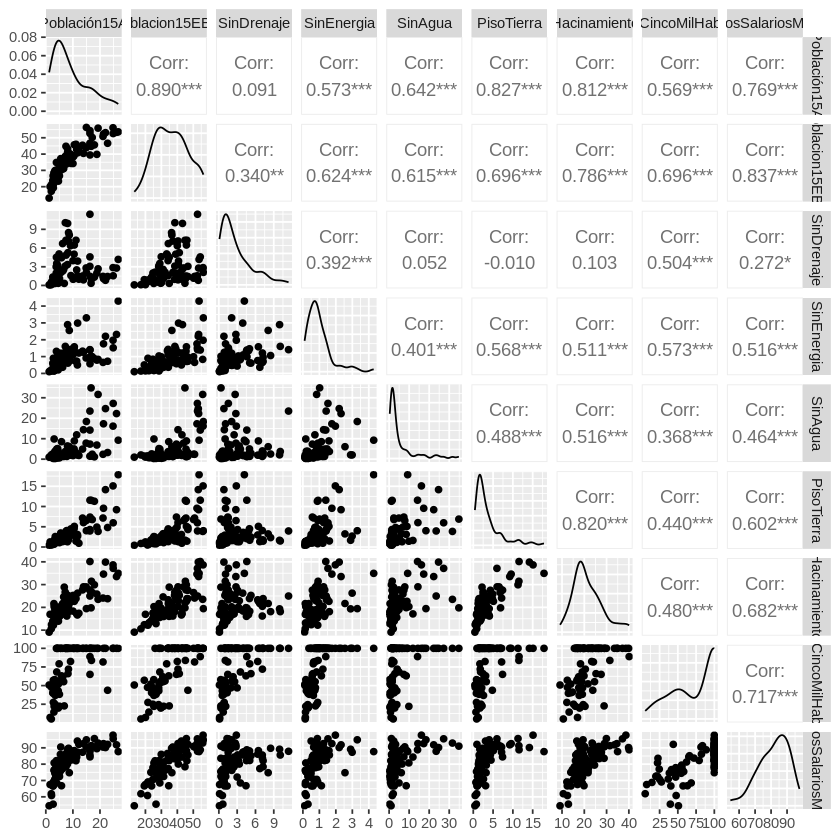

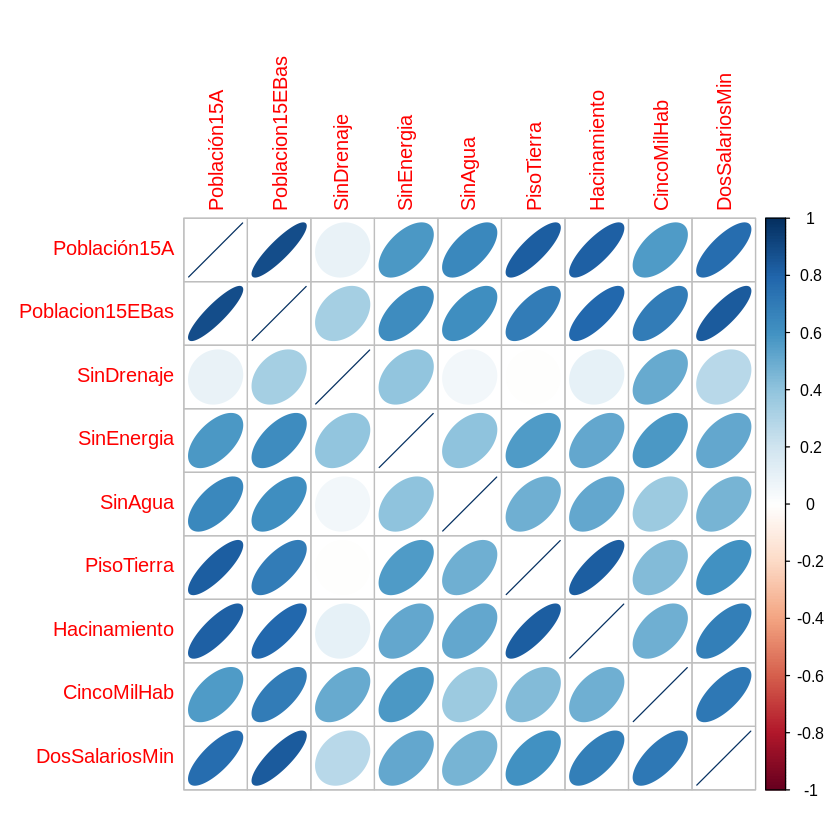

In [ ]:
library(GGally)
ggpairs(HgoNum) # Graficamos pairs

library(corrplot)
corrH <- cor(HgoNum)
corrplot(corrH, method="ellipse") # Graficamos matriz correlacion

## Visualizaciones Yucatán

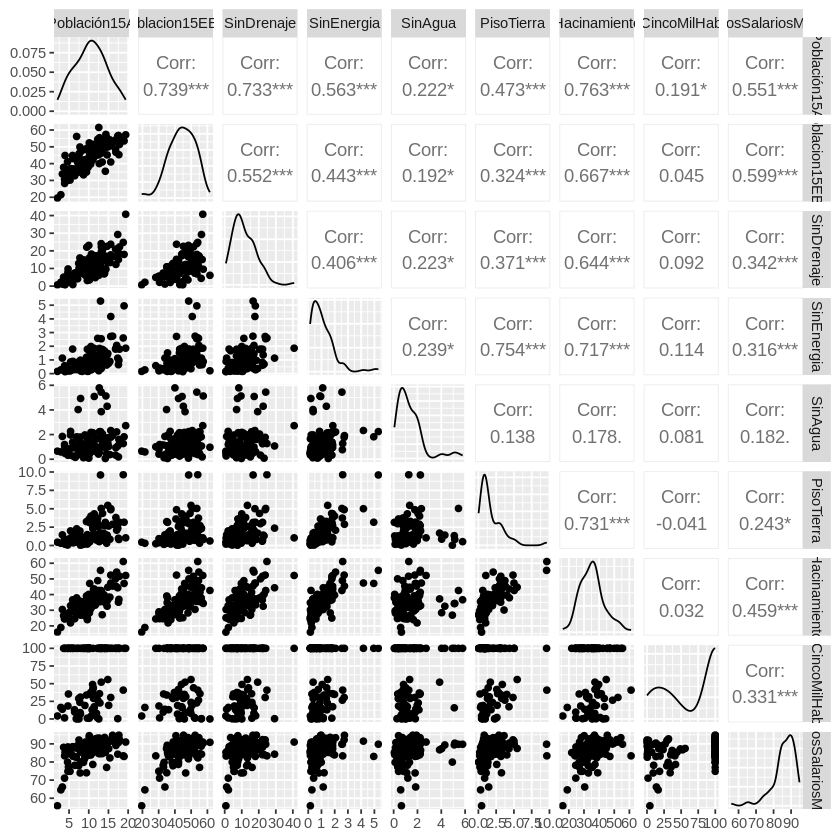

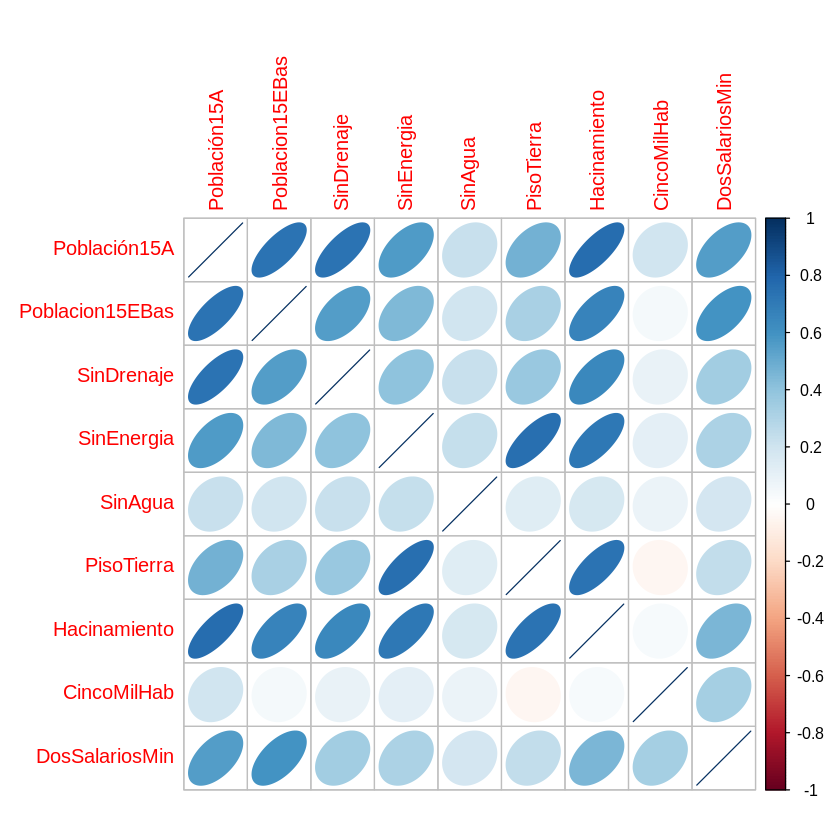

In [ ]:
ggpairs(YucNum) # Graficamos pairs
corrY <- cor(YucNum)
corrplot(corrY, method="ellipse") # Graficamos matriz correlacion

## Visualizaciones Hgo + Yucatan

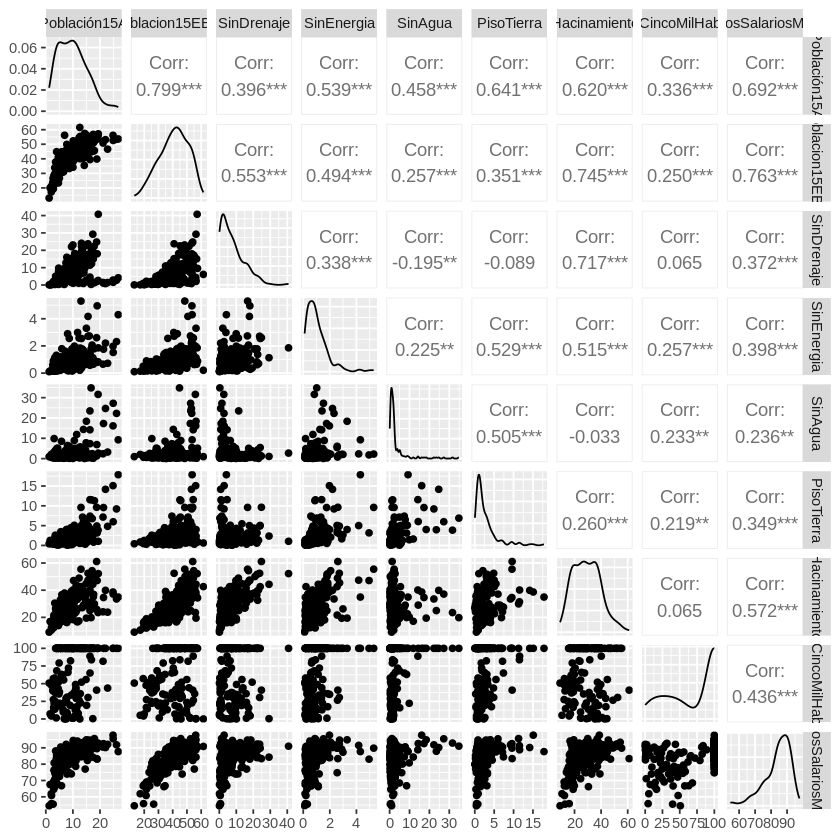

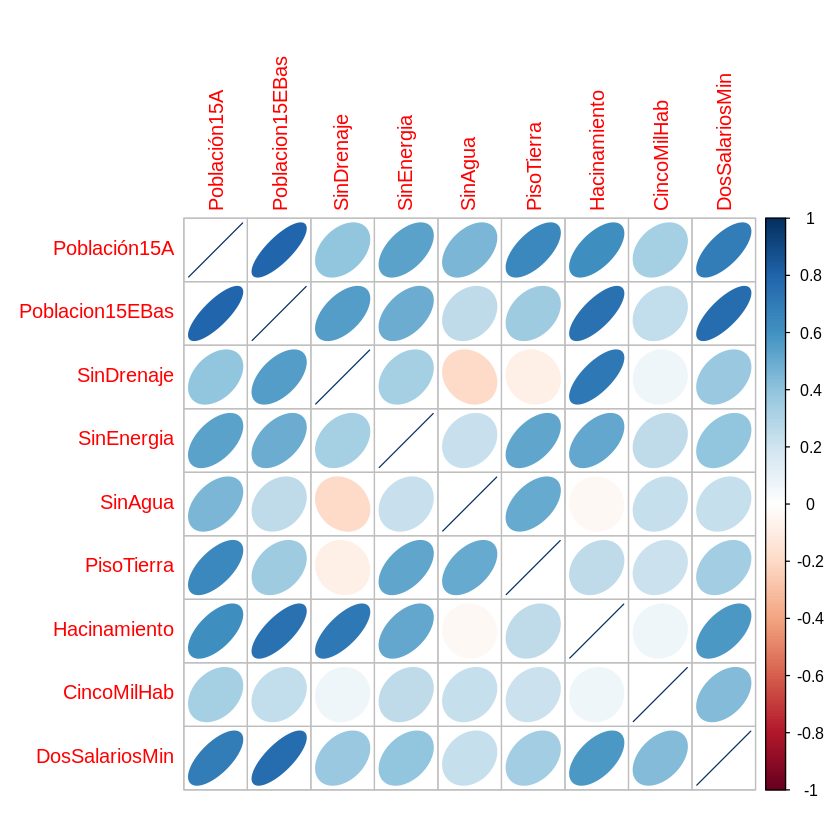

In [ ]:
ggpairs(CompNum) # Graficamos pairs
corrC <- cor(CompNum)
corrplot(corrC, method="ellipse") # Graficamos matriz correlacion

## PCA Hgo

Realizamos PCA para los datos de Hidalgo

In [ ]:
pH <- princomp(HgoNum, cor = T)
summary(pH)
loadings(pH)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.3490981 1.1628327 0.77618777 0.74447154 0.61337242
Proportion of Variance 0.6131402 0.1502422 0.06694083 0.06158199 0.04180286
Cumulative Proportion  0.6131402 0.7633824 0.83032325 0.89190523 0.93370809
                           Comp.6     Comp.7    Comp.8     Comp.9
Standard deviation     0.48843495 0.40714922 0.3676928 0.23893507
Proportion of Variance 0.02650763 0.01841894 0.0150220 0.00634333
Cumulative Proportion  0.96021573 0.97863467 0.9936567 1.00000000


Loadings:
                Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
Población15A     0.393  0.209                       0.133  0.510  0.316  0.646
Poblacion15EBas  0.403                0.163  0.125  0.291  0.160  0.473 -0.676
SinDrenaje       0.133 -0.747        -0.101  0.581         0.151 -0.180  0.109
SinEnergia       0.309 -0.221        -0.750 -0.409  0.285 -0.175              
SinAgua          0.283  0.216 -0.892 -0.108        -0.128 -0.110 -0.194       
PisoTierra       0.349  0.306  0.333 -0.249  0.117 -0.394  0.375 -0.470 -0.284
Hacinamiento     0.364  0.227  0.247         0.445 -0.147 -0.692  0.177  0.163
CincoMilHab      0.319 -0.388         0.296 -0.473 -0.630         0.179       
DosSalariosMin   0.366         0.109  0.484 -0.205  0.474 -0.156 -0.566       

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.111  0.111  0.111  0.111

Obtenemos las primeras tres componentes y proyecciones

In [ ]:
# Obtener la dirección de proyección
lH1 <- pH$loadings[,1] 
lH2 <- pH$loadings[,2] 
lH3 <- pH$loadings[,3] 

# Generamos el vector de proyecciones
pH1 <- replicate(84,0) 
pH2 <- replicate(84,0) 
pH3 <- replicate(84,0) 

aH <- as.matrix(HgoNum)

# Proyectamos
for (i in 1:84){
  pH1[i] <- aH[i,] %*% lH1
  pH2[i] <- aH[i,] %*% lH2
  pH3[i] <- aH[i,] %*% lH3
}

Creamos vector de colores de acuerdo al nivel de marginación

In [ ]:
colorplotH <- replicate(84,0)

for (i in 1:84){
  if (Hgo$Grado[i] == 'Muy alto'){
    colorplotH[i] <- 'red'
  }
  if (Hgo$Grado[i] == 'Alto'){
    colorplotH[i] <- 'orange'
  }
  if (Hgo$Grado[i] == 'Medio'){
    colorplotH[i] <- 'yellow'
  }
  if (Hgo$Grado[i] == 'Bajo'){
    colorplotH[i] <- 'green'
  }
  if (Hgo$Grado[i] == 'Muy bajo'){
    colorplotH[i] <- 'darkgreen'
  }
}

Realizamos 3 plots:


1.   Scatterplot 3D. Cada eje corresponde a una proyección. Se colorea de acuerdo con el grado de marginación.
2.   Scatterplot 2D. Los ejes corresponden a la primera y segunda proyección. Se colorea de acuerdo con el grado de marginación.
3.   Scatterplot 2D. Se compara la primera componente con el índice de marginación.



In [ ]:
library("scatterplot3d")

png(filename = "PCAH03.png", width = 1000, height = 1000, units = "px", pointsize = 12)
scatterplot3d(pH1, pH2, pH3, pch = 16, type = 'h', color = colorplotH,
              main = 'Hidalgo con grado de marginación (3C)',
              xlab = 'Componente 1',
              ylab = 'Componente 2',
              zlab = 'Componente 3')
dev.off()

png(filename = "PCAH02.png", width = 1000, height = 1000, units = "px", pointsize = 12)
plot(pH1, pH2, pch = 16, col = colorplotH,
      main = 'Hidalgo con grado de marginación (2C)',
      xlab = 'Componente 1',
      ylab = 'Componente 2')
dev.off()

attach(Hgo)
png(filename = "PCAH01.png", width = 1000, height = 1000, units = "px", pointsize = 12)
plot(x = pH1, y = Hgo$Indice,
      main = "Componente 1 vs Índice de marginación, Hgo",
      xlab = "Proyección", ylab = "Índice",
      pch = 1, col = "blue")
text(pH1, Hgo$Indice,
     labels = Hgo$Municipio,
     cex = 0.6, pos = 4)
dev.off()
detach(Hgo)

png 
  2

png 
  2

png 
  2

## PCA Yuc

Realizamos PCA para los datos de Hidalgo

In [ ]:
pY <- princomp(YucNum, cor = T)
summary(pY)
loadings(pY)

Importance of components:
                         Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.101251 1.1290950 0.9687434 0.94860878 0.78820093
Proportion of Variance 0.490584 0.1416506 0.1042738 0.09998429 0.06902897
Cumulative Proportion  0.490584 0.6322346 0.7365084 0.83649270 0.90552166
                           Comp.6     Comp.7     Comp.8     Comp.9
Standard deviation     0.56904522 0.46003564 0.41846516 0.37382708
Proportion of Variance 0.03597916 0.02351475 0.01945701 0.01552741
Cumulative Proportion  0.94150083 0.96501558 0.98447259 1.00000000


Loadings:
                Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
Población15A     0.424  0.120  0.171         0.199  0.138         0.829  0.143
Poblacion15EBas  0.375  0.155  0.325  0.245 -0.267  0.564  0.186 -0.400  0.292
SinDrenaje       0.355         0.178  0.260  0.655 -0.370 -0.272 -0.347  0.114
SinEnergia       0.367 -0.279 -0.301 -0.295         0.339 -0.696              
SinAgua          0.152  0.136 -0.761  0.602                0.105              
PisoTierra       0.333 -0.454 -0.219 -0.322        -0.319  0.400         0.506
Hacinamiento     0.432 -0.193                              0.371        -0.786
CincoMilHab             0.642 -0.311 -0.550  0.311  0.160  0.200 -0.134       
DosSalariosMin   0.302  0.455  0.121        -0.585 -0.532 -0.235              

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.111  0.111  0.111  0.111

Obtenemos las primeras tres componentes y proyecciones

In [ ]:
# Obtener la dirección de proyección
lY1 <- pY$loadings[,1] 
lY2 <- pY$loadings[,2] 
lY3 <- pY$loadings[,3] 

# Generamos el vector de proyecciones
pY1 <- replicate(106,0) 
pY2 <- replicate(106,0) 
pY3 <- replicate(106,0) 

aY <- as.matrix(YucNum)

# Proyectamos
for (i in 1:106){
  pY1[i] <- aY[i,] %*% lY1
  pY2[i] <- aY[i,] %*% lY2
  pY3[i] <- aY[i,] %*% lY3
}

Creamos vector de colores de acuerdo al nivel de marginación

In [ ]:
colorplotY <- replicate(106,0)

for (i in 1:106){
  if (Yuc$Grado[i] == 'Muy alto'){
    colorplotY[i] <- 'red'
  }
  if (Yuc$Grado[i] == 'Alto'){
    colorplotY[i] <- 'orange'
  }
  if (Yuc$Grado[i] == 'Medio'){
    colorplotY[i] <- 'yellow'
  }
  if (Yuc$Grado[i] == 'Bajo'){
    colorplotY[i] <- 'green'
  }
  if (Yuc$Grado[i] == 'Muy bajo'){
    colorplotY[i] <- 'darkgreen'
  }
}

Realizamos 3 plots:


1.   Scatterplot 3D. Cada eje corresponde a una proyección. Se colorea de acuerdo con el grado de marginación.
2.   Scatterplot 2D. Los ejes corresponden a la primera y segunda proyección. Se colorea de acuerdo con el grado de marginación.
3.   Scatterplot 2D. Se compara la primera componente con el índice de marginación.

In [ ]:
png(filename = "PCAY03.png", width = 1000, height = 1000, units = "px", pointsize = 12)
scatterplot3d(pY1, pY2, pY3, pch = 16, type = 'h', color = colorplotY,
              main = 'Yucatán con grado de marginación (3C)',
              xlab = 'Componente 1',
              ylab = 'Componente 2',
              zlab = 'Componente 3')
dev.off()

png(filename = "PCAY02.png", width = 1000, height = 1000, units = "px", pointsize = 12)
plot(pY1, pY2, pch = 16, col = colorplotY,
      main = 'Yucatán con grado de marginación (2C)',
              xlab = 'Componente 1',
              ylab = 'Componente 2')
dev.off()

attach(Yuc)
png(filename = "PCAY01.png", width = 1000, height = 1000, units = "px", pointsize = 12)
plot(x = pY1, y = Yuc$Indice,
      main = "Componente 1 vs Índice Marginación, Yucatán",
      xlab = "Proyección", ylab = "Índice",
      pch = 1, col = "blue")
text(pY1, Yuc$Indice,
     labels = Yuc$Municipio,
     cex = 0.6, pos = 4)
dev.off()
detach(Yuc)

png 
  2

png 
  2

png 
  2

## PCA Hgo + Yuc

Aplicamos PCA

In [ ]:
p <- princomp(CompNum, cor = T)
summary(p)
loadings(p)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.0850855 1.3277802 0.9679725 0.83207319 0.67974504
Proportion of Variance 0.4830646 0.1958889 0.1041079 0.07692731 0.05133926
Cumulative Proportion  0.4830646 0.6789535 0.7830614 0.85998869 0.91132795
                           Comp.6     Comp.7     Comp.8     Comp.9
Standard deviation     0.56914488 0.42927839 0.42719175 0.32764281
Proportion of Variance 0.03599177 0.02047555 0.02027698 0.01192776
Cumulative Proportion  0.94731972 0.96779527 0.98807224 1.00000000


Loadings:
                Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
Población15A     0.436  0.119         0.182         0.311  0.295  0.379  0.654
Poblacion15EBas  0.428 -0.132         0.297        -0.199  0.569  0.117 -0.576
SinDrenaje       0.266 -0.530               -0.478  0.343 -0.402  0.316 -0.194
SinEnergia       0.336         0.251 -0.694 -0.203 -0.519         0.124  0.102
SinAgua          0.180  0.551  0.103  0.397 -0.632 -0.131 -0.174 -0.220       
PisoTierra       0.284  0.440  0.356 -0.217  0.371  0.451 -0.251        -0.385
Hacinamiento     0.375 -0.362  0.180                0.122        -0.802  0.185
CincoMilHab      0.196  0.235 -0.809 -0.356 -0.120  0.245  0.134 -0.173       
DosSalariosMin   0.389        -0.328  0.253  0.412 -0.425 -0.560              

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.111  0.111  0.111  0.111

Obtenemos la tres primeras componentes y proyecciones

In [ ]:
# Obtener la dirección de proyección
l1 <- p$loadings[,1] 
l2 <- p$loadings[,2] 
l3 <- p$loadings[,3] 

# Generamos el vector de proyecciones
p1 <- replicate(190,0) 
p2 <- replicate(190,0) 
p3 <- replicate(190,0) 

a <- as.matrix(CompNum)

# Proyectamos
for (i in 1:190){
  p1[i] <- a[i,] %*% l1
  p2[i] <- a[i,] %*% l2
  p3[i] <- a[i,] %*% l3
}

Creamos vector de colores de acuerdo con el estado

In [ ]:
colorplot <- replicate(190,0)

for (i in 1:190){
  if (Comp$ClaveE[i] == 13){
    colorplot[i] <- 'royalblue1'
  } else{
    colorplot[i] <- 'red'
  }
}

Realizamos dos gráficas, ambas se colorean de acuerdo con el estado:


1.   Scatterplot 3D. Cada eje corresponde a una componente.
2.   Scatterplot 2D. Los ejes corresponden a la primera y segunda componente.



In [ ]:
#install.packages("scatterplot3d")
library("scatterplot3d")

# Plot
png(filename = "PCAHY03.png", width = 1000, height = 1000, units = "px", pointsize = 12)
scatterplot3d(p1, p2, p3, pch = 16, type = "h", color = c(colorplotH,colorplotY),
              main = 'Hidalgo y Yucatán (3C), grado de marginación',
              xlab = 'Componente 1',
              ylab = 'Componente 2',
              zlab = 'Componente 3')
dev.off()

png(filename = "PCAHY04.png", width = 1000, height = 1000, units = "px", pointsize = 12)
scatterplot3d(p1, p2, p3, pch = 16, type = "h", color = colorplot,
              main = 'Hidalgo y Yucatán (3C)',
              xlab = 'Componente 1',
              ylab = 'Componente 2',
              zlab = 'Componente 3')
dev.off()

png 
  2

png 
  2

In [ ]:
png(filename = "PCAHY01.png", width = 1000, height = 1000, units = "px", pointsize = 12)
plot(p1, p2, pch = 16, col = c(colorplotH,colorplotY),
      main = 'Hidalgo y Yucatán (3C), grado de marginación',
      xlab = 'Componente 1',
      ylab = 'Componente 2')
dev.off()

png(filename = "PCAHY02.png", width = 1000, height = 1000, units = "px", pointsize = 12)
plot(p1, p2, pch = 16, col = colorplot,
      main = 'Hidalgo y Yucatán (2C)',
      xlab = 'Componente 1',
      ylab = 'Componente 2')
dev.off()

png 
  2

png 
  2

## Isomap Hgo

species scores not available



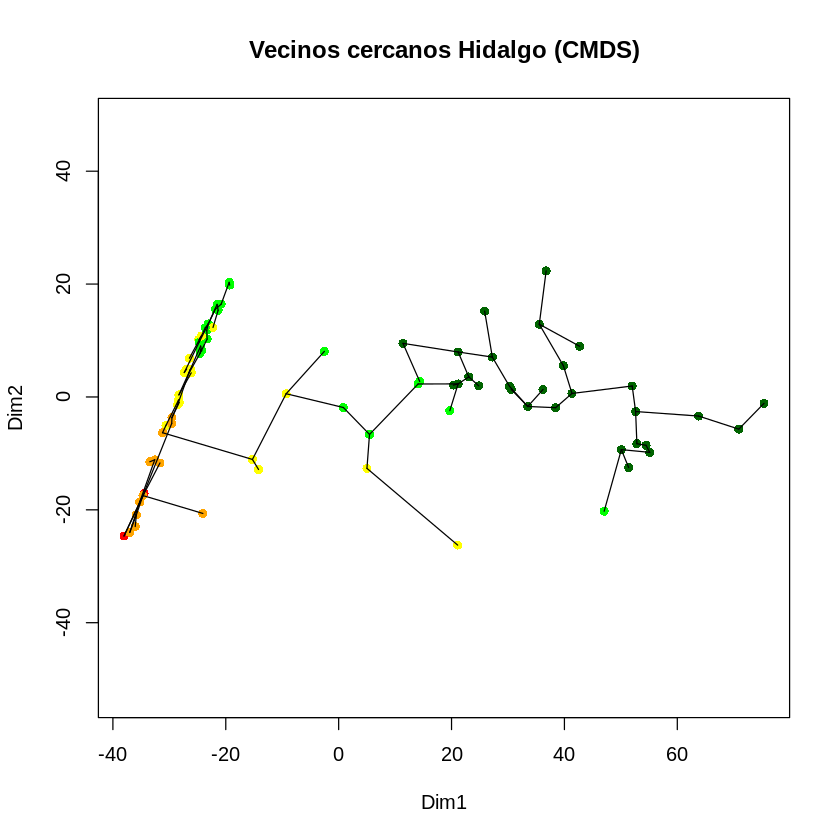

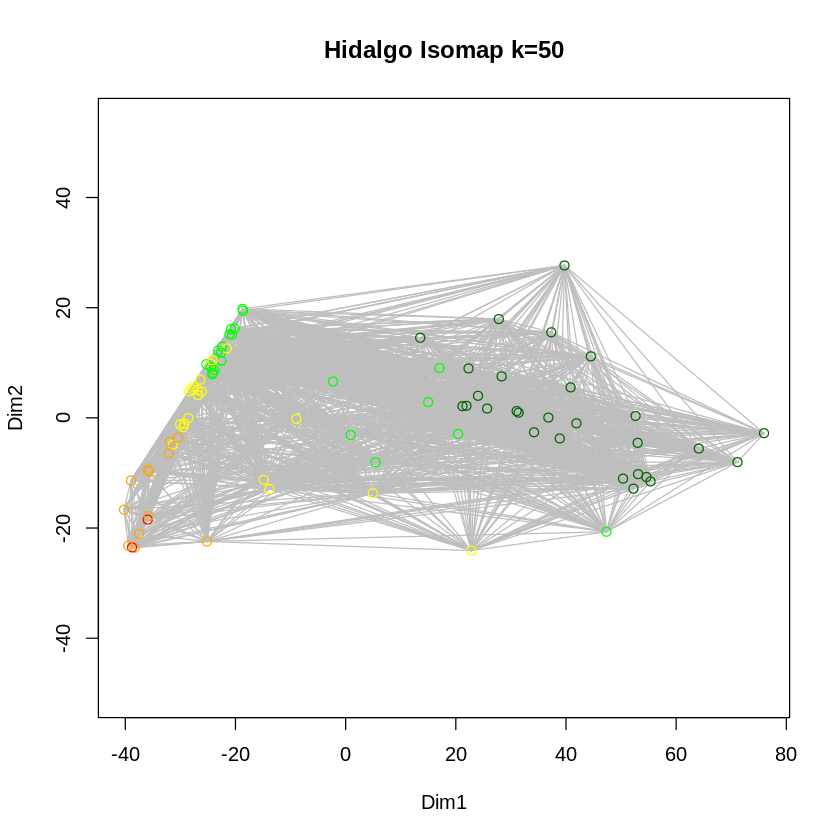

In [ ]:
library(vegan)

dis <- dist(HgoNum)

tr <- spantree(dis)
pl <- ordiplot(cmdscale(dis), main = "Vecinos cercanos Hidalgo (CMDS)")

points(pl, "sites", pch = 16, col = colorplotH)
lines(tr, pl)

ord <- isomap(dis, k = 50)
plot(ord, col = colorplotH, main = "Hidalgo Isomap k=50")

## Isomap Yucatán

species scores not available



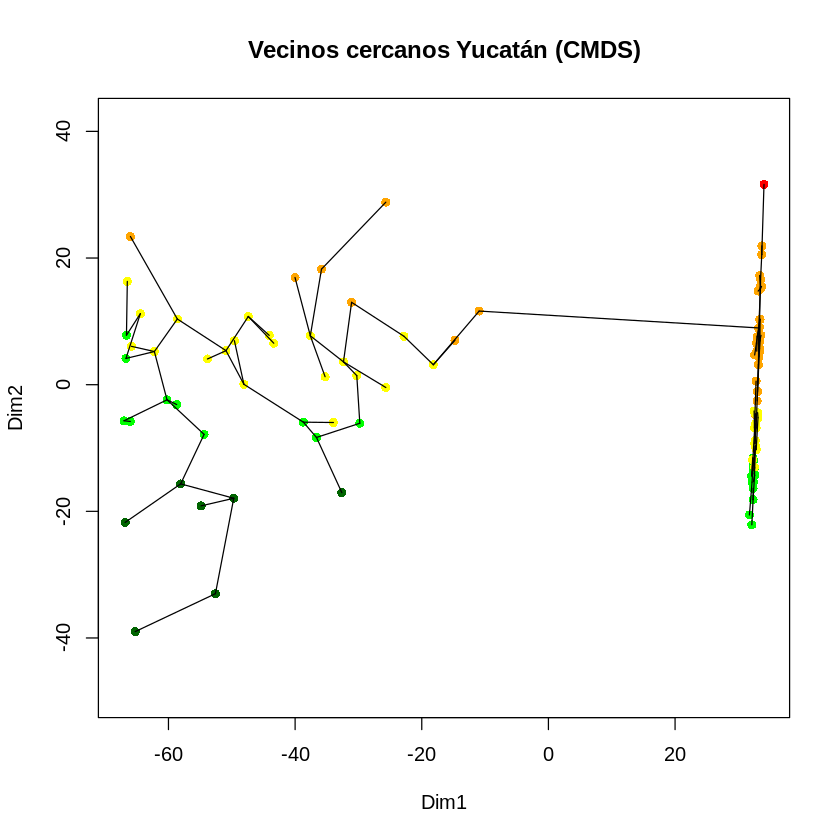

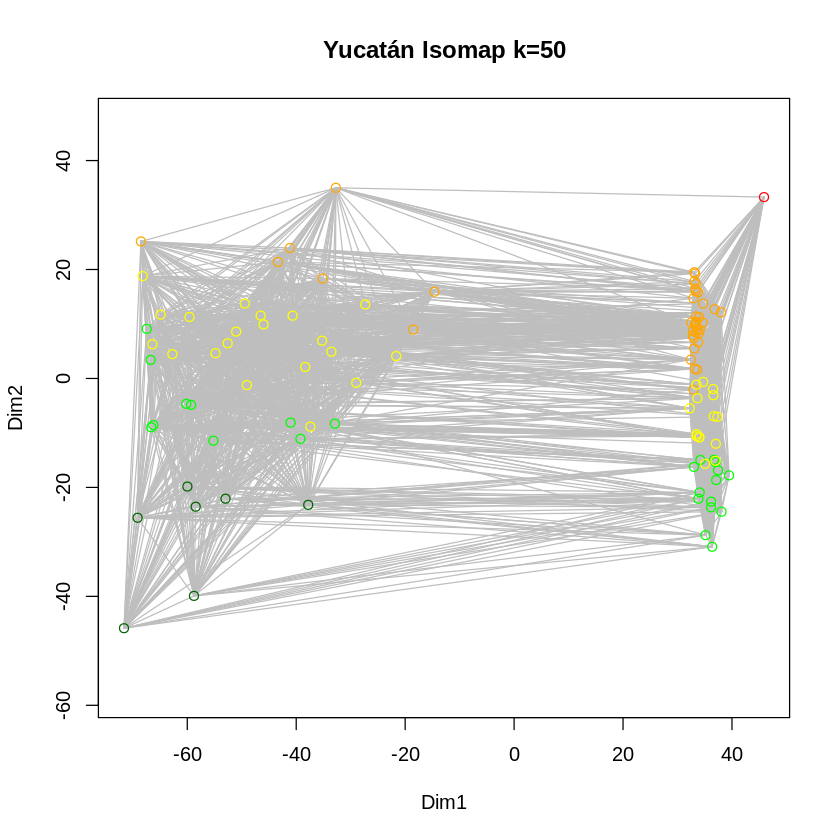

In [ ]:
#install.packages('vegan')
library(vegan)

dis <- dist(YucNum)

tr <- spantree(dis)
pl <- ordiplot(cmdscale(dis), main = "Vecinos cercanos Yucatán (CMDS)")

points(pl, "sites", pch = 16, col = colorplotY)
lines(tr, pl)

ord <- isomap(dis, k = 50)
plot(ord, col = colorplotY, main = "Yucatán Isomap k=50")

## Isomap Hgo+Yuc

species scores not available



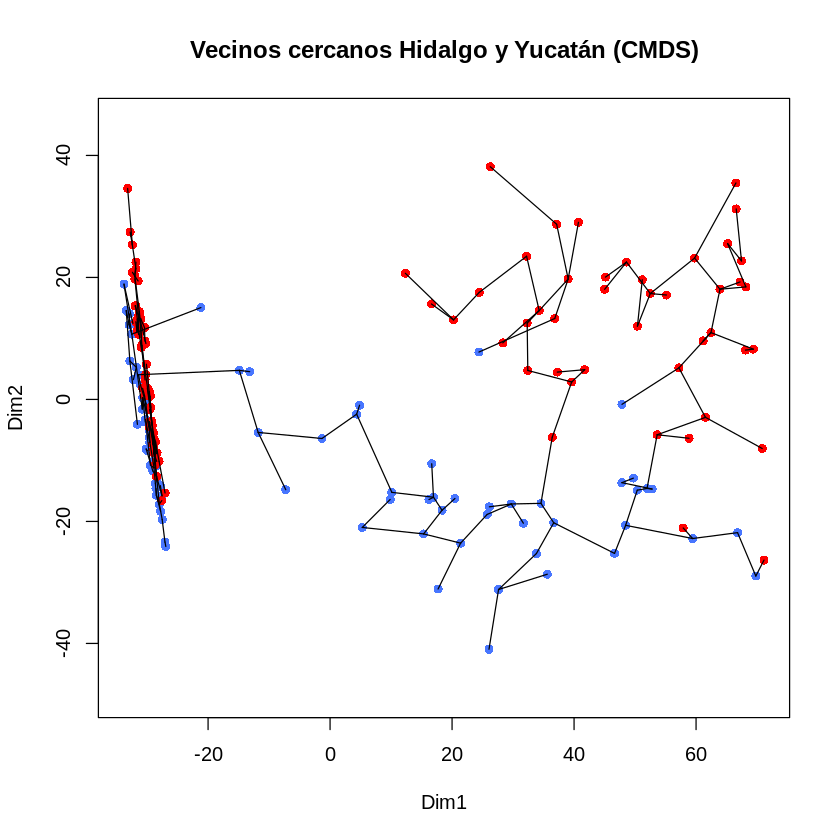

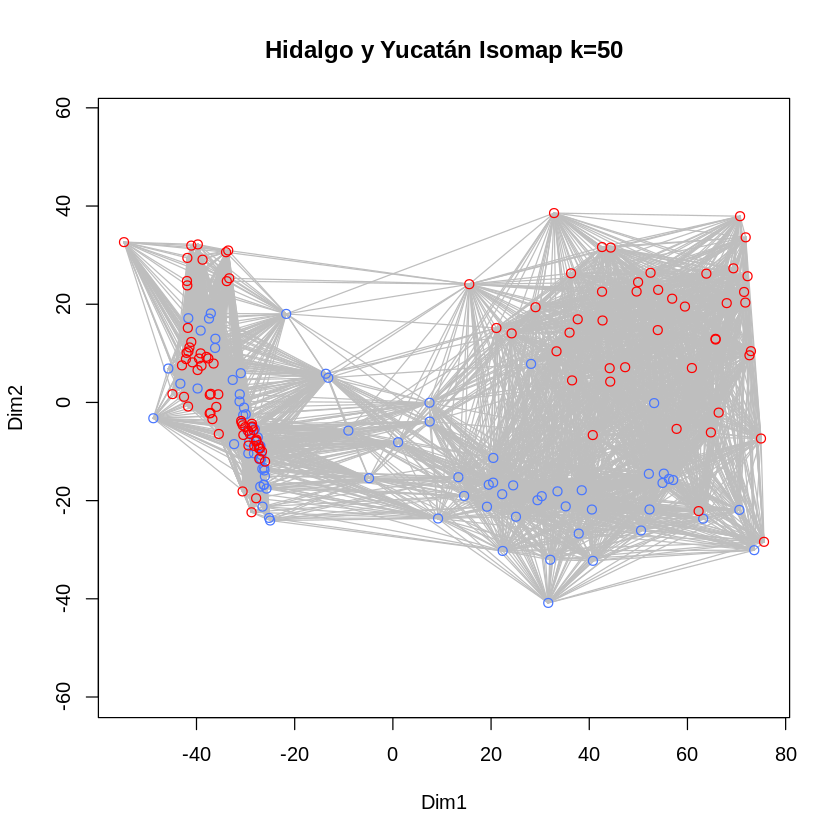

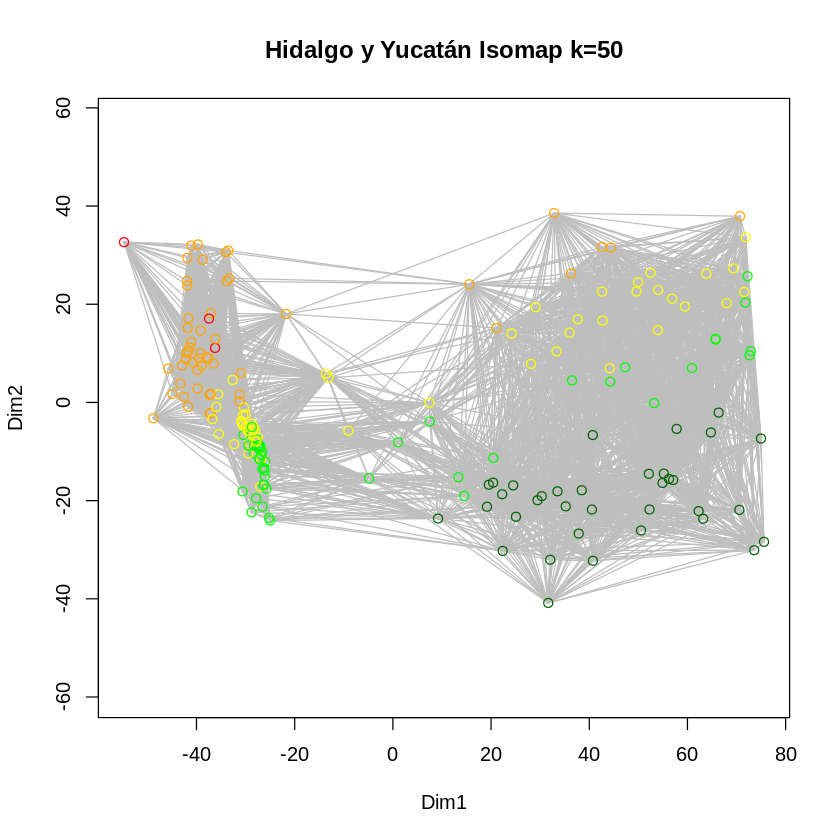

In [ ]:
#install.packages('vegan')
library(vegan)

dis <- dist(CompNum)

tr <- spantree(dis)
pl <- ordiplot(cmdscale(dis), main = "Vecinos cercanos Hidalgo y Yucatán (CMDS)")

points(pl, "sites", pch = 16, col = colorplot)
lines(tr, pl)

ord <- isomap(dis, k = 50)
plot(ord, col = colorplot, main = "Hidalgo y Yucatán Isomap k=50")
plot(ord, col = c(colorplotH, colorplotY), main = "Hidalgo y Yucatán Isomap k=50, grado de marginación")

species scores not available



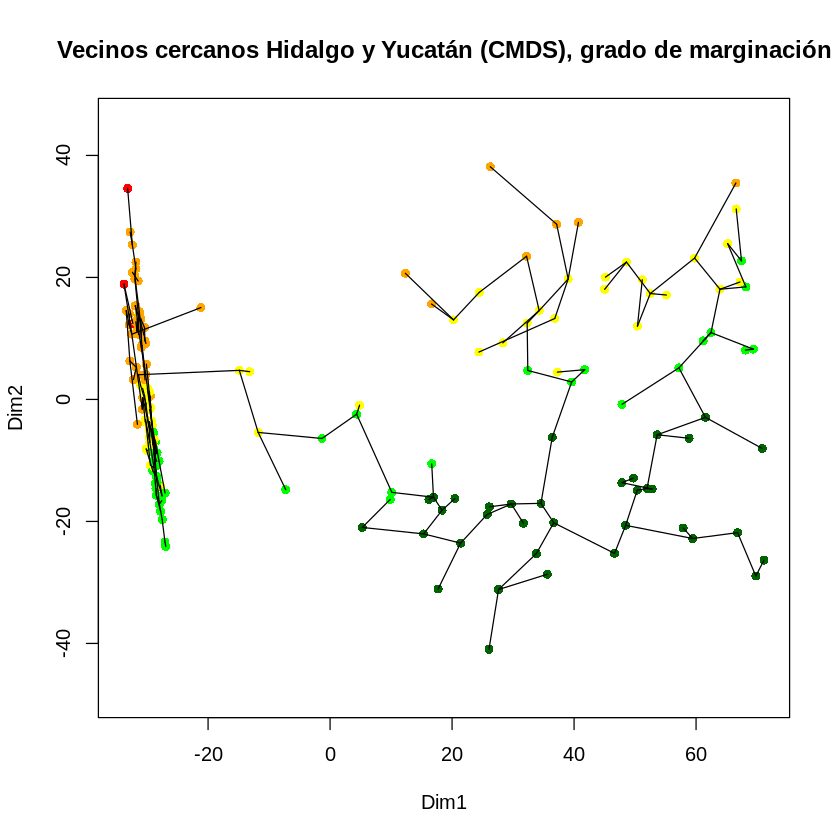

In [ ]:
dis <- dist(CompNum)

tr <- spantree(dis)
pl <- ordiplot(cmdscale(dis), main = "Vecinos cercanos Hidalgo y Yucatán (CMDS), grado de marginación")

points(pl, "sites", pch = 16, col = c(colorplotH, colorplotY))
lines(tr, pl)

## SOM Hgo

Warning message in par(opar):
“argument 1 does not name a graphical parameter”


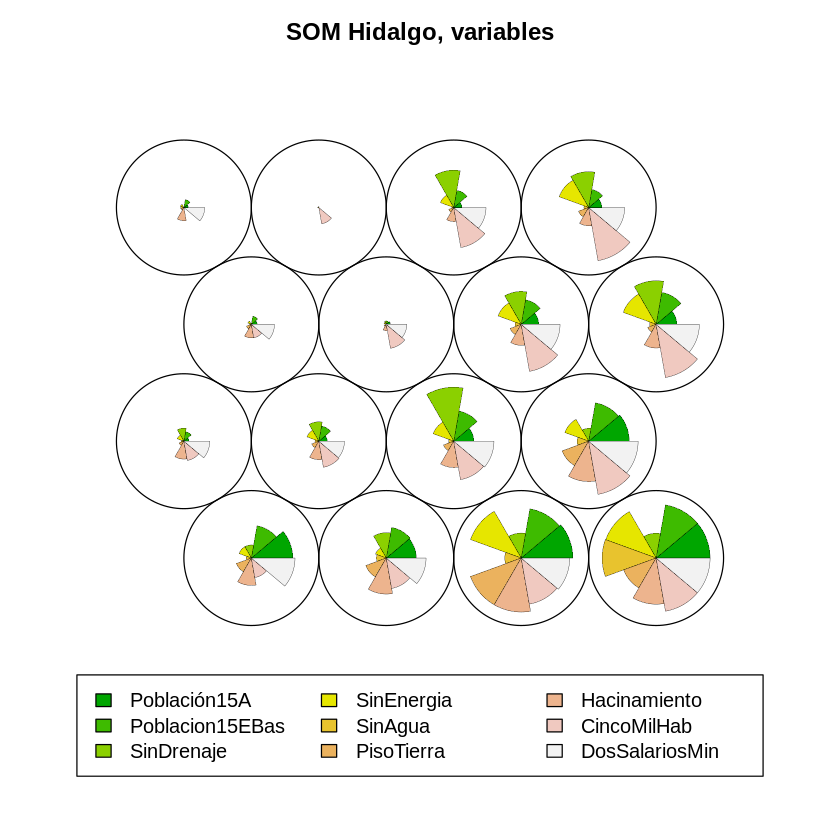

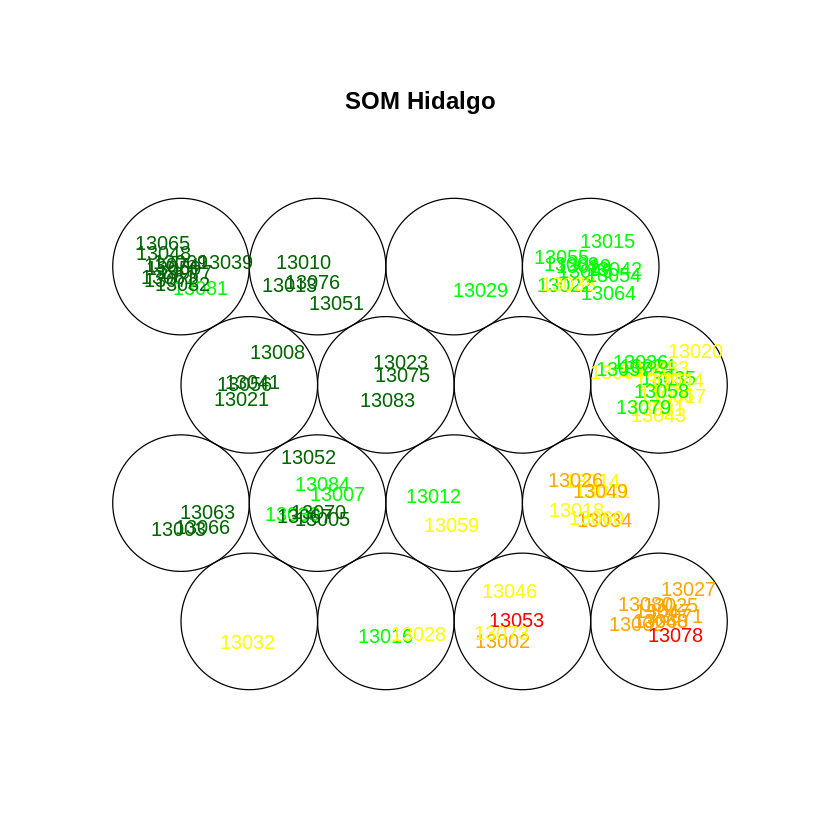

In [ ]:
library(kohonen)

mysomH <- som(as.matrix(HgoNum), somgrid(4,4,"hexagonal"))

plot(mysomH, type="codes", main = 'SOM Hidalgo, variables')

plot(mysomH, type="mapping", col = colorplotH, pch=19, label = Hgo$ClaveM, main = 'SOM Hidalgo')

## SOM Yuc

Warning message in par(opar):
“argument 1 does not name a graphical parameter”


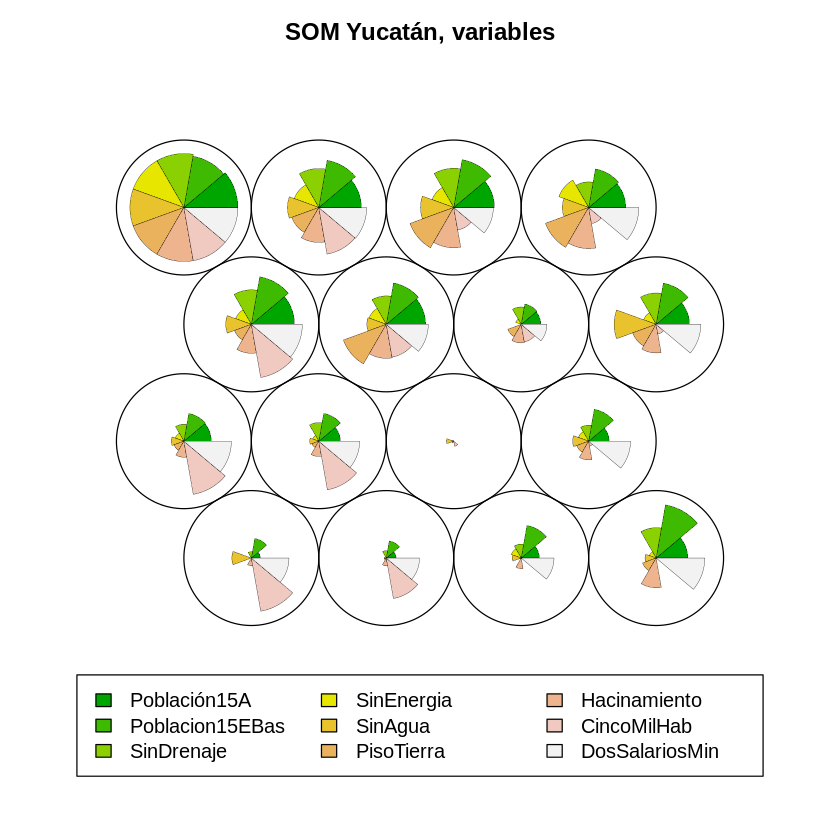

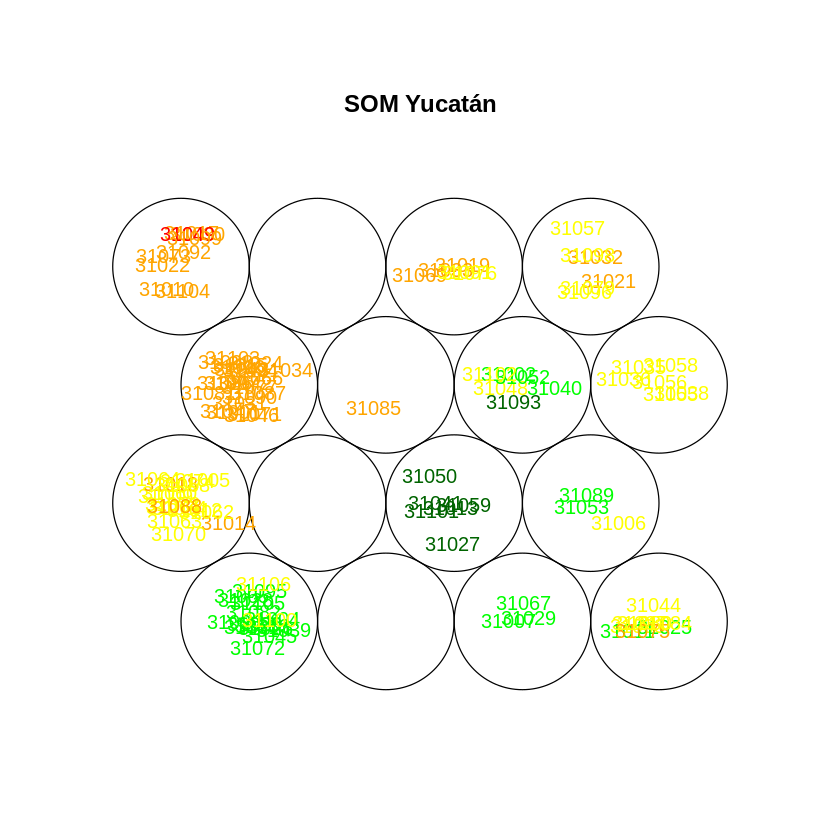

In [ ]:
#install.packages("kohonen")
library(kohonen)

mysomY <- som(as.matrix(YucNum), somgrid(4,4,"hexagonal"))

plot(mysomY, type="codes", main = 'SOM Yucatán, variables')

plot(mysomY, type="mapping", col = colorplotY, pch=19, label = Yuc$ClaveM, main = 'SOM Yucatán')

## SOM Hgo+Yuc

Warning message in par(opar):
“argument 1 does not name a graphical parameter”


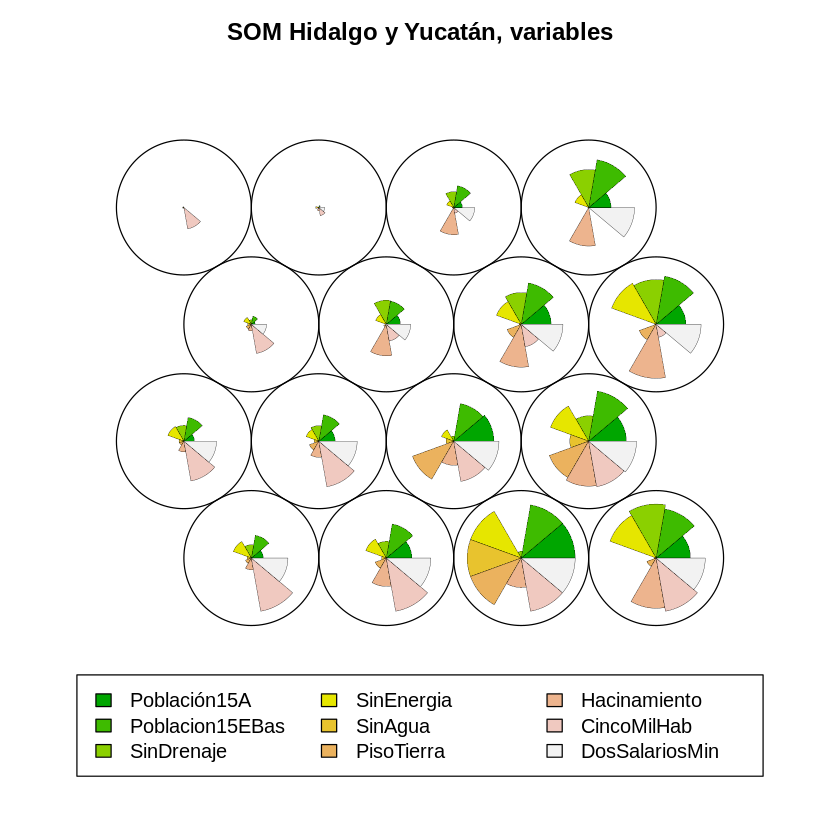

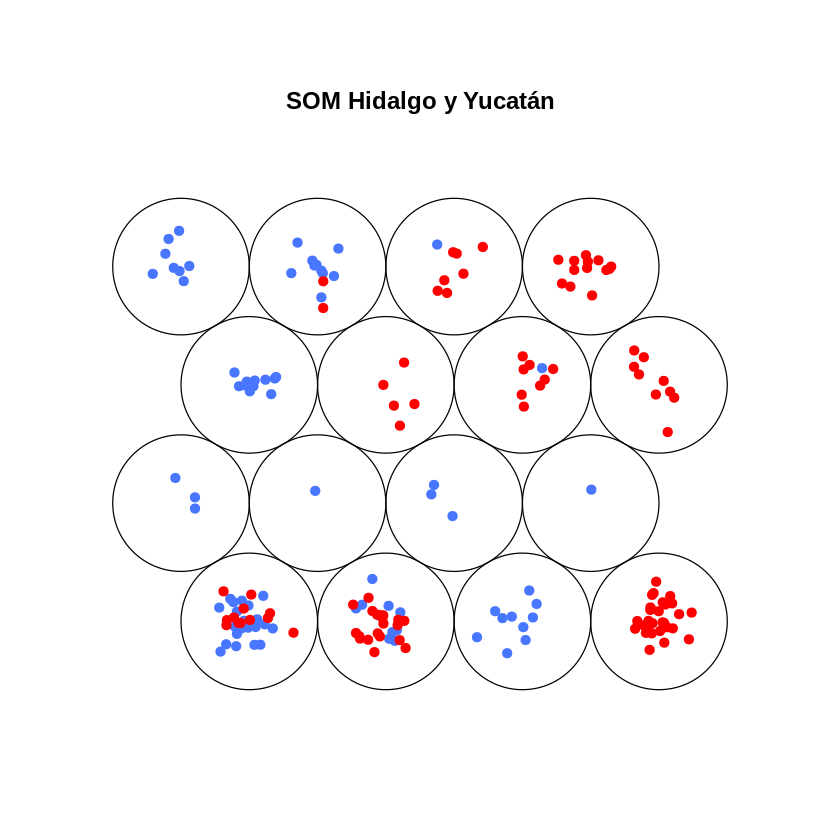

In [ ]:
#install.packages("kohonen")
library(kohonen)

mysom <- som(as.matrix(CompNum), somgrid(4,4,"hexagonal"))

plot(mysom, type="codes", main = 'SOM Hidalgo y Yucatán, variables')

plot(mysom, type="mapping", col = colorplot, pch=19, main = 'SOM Hidalgo y Yucatán')

## T-SNE Hgo

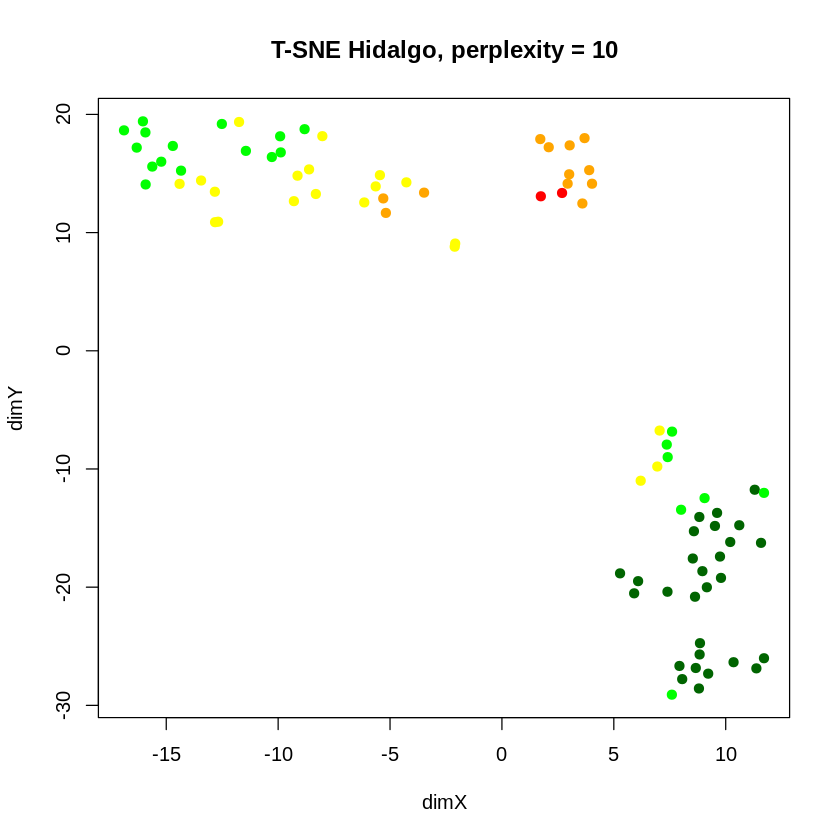

In [ ]:
# Librerias necesarias
library(tidyverse)
library(Rtsne)

# No se pa que es
set.seed(sample(1:300,1))

# Hacemos TSNE a los datos, hay que ver que perplexity te queda mejor
# donde dice HgoNum debe ir tus datos
tSNE_fitH <- HgoNum %>%
  Rtsne(perplexity = 10)

# Agarramos las variables para plotear
# como tal no hay que cambiar nada
tSNE_dfH <- tSNE_fitH$Y %>% 
  as.data.frame() %>%
  rename(dimX="V1",
         dimY="V2")

# ploteamos
plot(tSNE_dfH, col=colorplotH, pch=19,
      main = "T-SNE Hidalgo, perplexity = 10")

##T-SNE Yuc

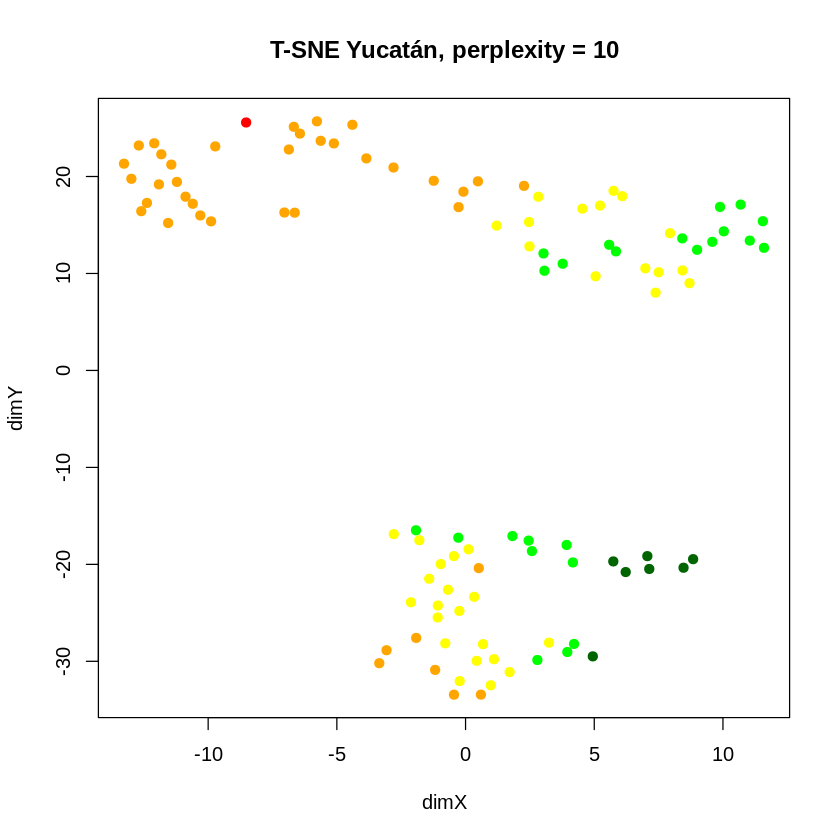

In [ ]:
# No se pa que es
set.seed(sample(1:300,1))

tSNE_fitY <- YucNum %>%
  Rtsne(perplexity = 10)

tSNE_dfY <- tSNE_fitY$Y %>% 
  as.data.frame() %>%
  rename(dimX="V1",
         dimY="V2")

plot(tSNE_dfY, col=colorplotY, pch=19,
      main = "T-SNE Yucatán, perplexity = 10")

## T-SNE Hgo+Yuc

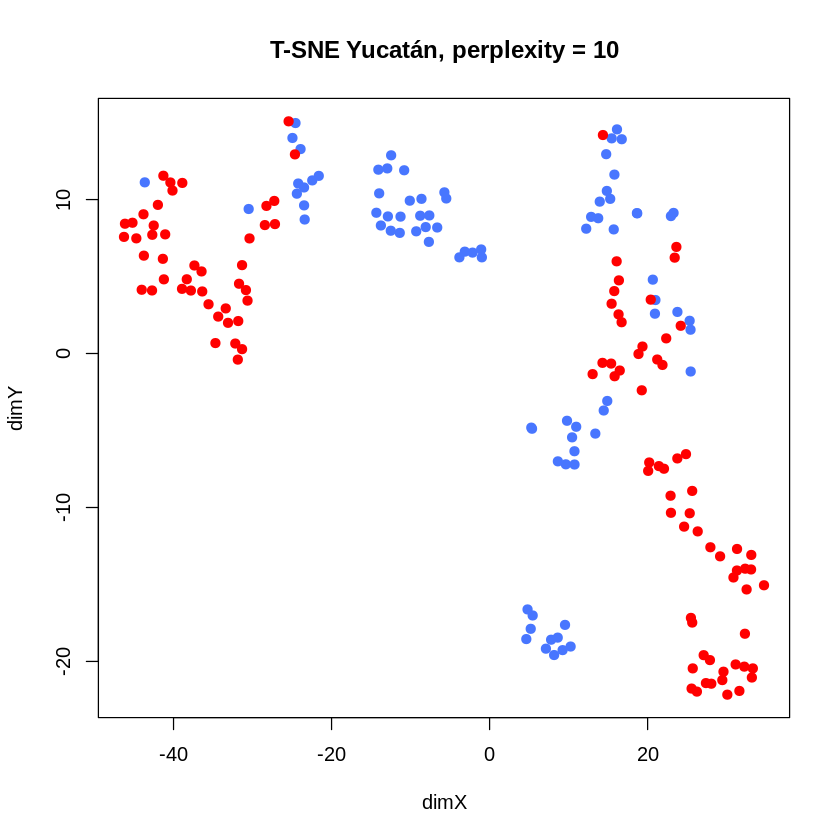

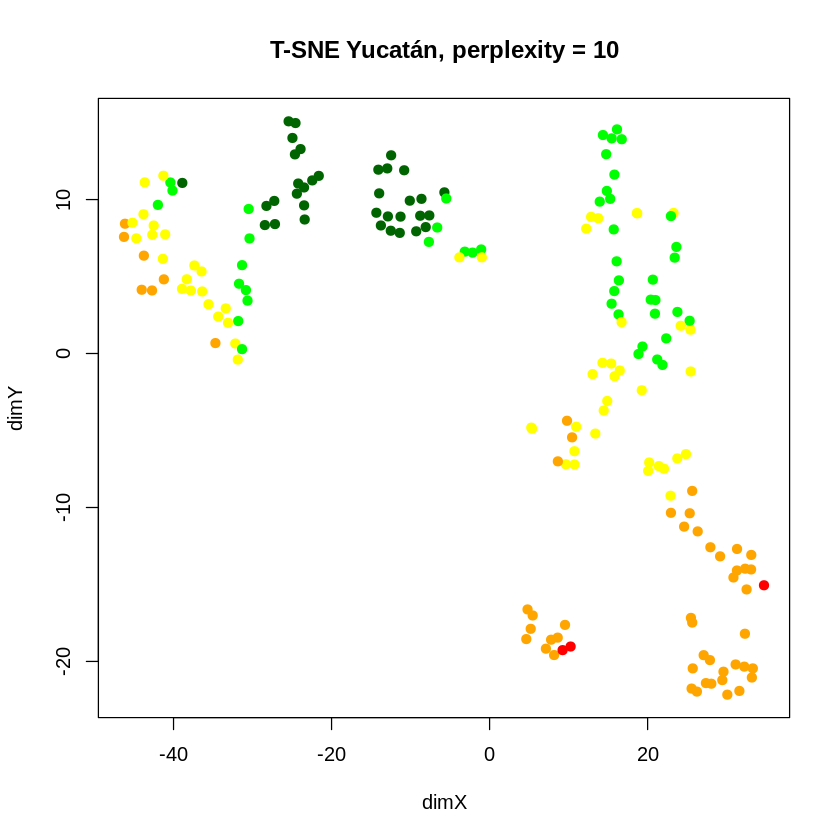

In [ ]:
# No se pa que es
set.seed(sample(1:300,1))

tSNE_fitHY <- CompNum %>%
  Rtsne(perplexity = 10)

tSNE_dfHY <- tSNE_fitHY$Y %>% 
  as.data.frame() %>%
  rename(dimX="V1",
         dimY="V2")

plot(tSNE_dfHY, col = colorplot, pch=19,
      main = "T-SNE Yucatán, perplexity = 10")

plot(tSNE_dfHY, col = c(colorplotH,colorplotY), pch=19,
      main = "T-SNE Yucatán, perplexity = 10")